In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [71]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Function to remove special characters and lemmatize
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text.lower())])
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
data = pd.read_csv("/content/24_train_1.csv")
data['Text'] = data['Text'].apply(preprocess_text)

## TFIDF Matrix

In [73]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)  # (1, 2) includes unigrams and bigrams
X = tfidf.fit_transform(data['Text'])
y = data['Category']

# Question 2

### Question 2.1

In [74]:
#80% train set and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

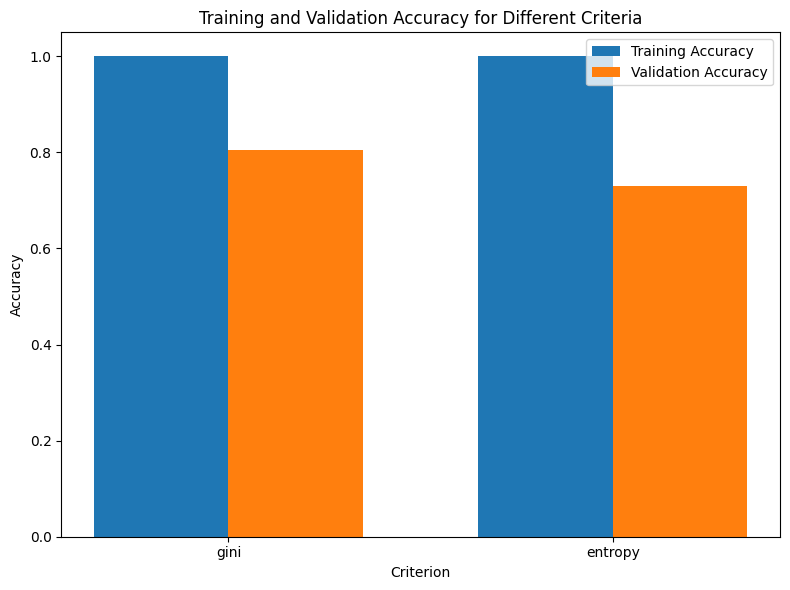

In [75]:
from sklearn.metrics import accuracy_score

criterions = ['gini', 'entropy']

train_accuracies = []
val_accuracies = []

# Train the model with both 'gini' and 'entropy'
for criterion in criterions:

    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the results
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(criterions))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')

plt.bar([i + bar_width for i in index], val_accuracies, bar_width, label='Validation Accuracy')

plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Criteria')
plt.xticks([i + bar_width / 2 for i in index], criterions)
plt.legend()

plt.tight_layout()
plt.show()

### Question 2.2

,min_samples_leaf,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std
0,1,1.000000,0.000000,0.803000,0.031241
1,2,0.970000,0.002092,0.801000,0.028705
2,3,0.953250,0.003122,0.814000,0.033076
3,4,0.936250,0.004541,0.802000,0.021587
4,5,0.921500,0.003984,0.795000,0.022804
5,10,0.867750,0.004899,0.777000,0.042024
6,20,0.812000,0.010506,0.721000,0.030561
7,25,0.788250,0.016097,0.733000,0.027129


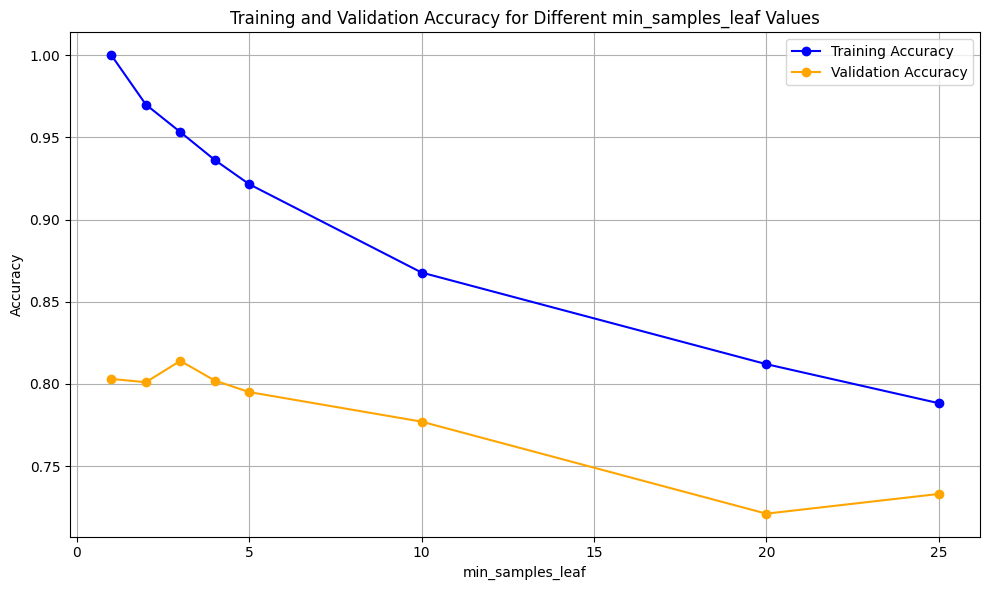

In [76]:
from sklearn.model_selection import KFold

min_samples_leaf_values = [1, 2, 3, 4, 5, 10, 20, 25]

# KFold cross-validator with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)


train_accuracies = []
val_accuracies = []
train_std_devs = []
val_std_devs = []

for min_samples in min_samples_leaf_values:
    fold_train_accuracies = []
    fold_val_accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        decision_tree = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
        decision_tree.fit(X_train, y_train)

        y_train_pred = decision_tree.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)

        y_val_pred = decision_tree.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        fold_val_accuracies.append(val_accuracy)

    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    train_std_devs.append(np.std(fold_train_accuracies))
    val_std_devs.append(np.std(fold_val_accuracies))

df_results = pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_values,
    'training_accuracy_mean': train_accuracies,
    'training_accuracy_std': train_std_devs,
    'validation_accuracy_mean': val_accuracies,
    'validation_accuracy_std': val_std_devs
})

styled_table = df_results.style.set_table_attributes('style="width: 80%; margin: auto;"')
display(styled_table)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(min_samples_leaf_values, train_accuracies, label='Training Accuracy', marker='o', color='blue')
plt.plot(min_samples_leaf_values, val_accuracies, label='Validation Accuracy', marker='o', color='orange')

plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different min_samples_leaf Values')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

### Question 2.3

,max_features,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std
0,10,1.000000,0.000000,0.616000,0.037336
1,20,1.000000,0.000000,0.659000,0.052096
2,30,1.000000,0.000000,0.699000,0.042708
3,50,1.000000,0.000000,0.704000,0.045978
4,100,1.000000,0.000000,0.727000,0.029766
5,200,1.000000,0.000000,0.753000,0.010296
6,250,1.000000,0.000000,0.757000,0.015033
7,300,1.000000,0.000000,0.739000,0.031686


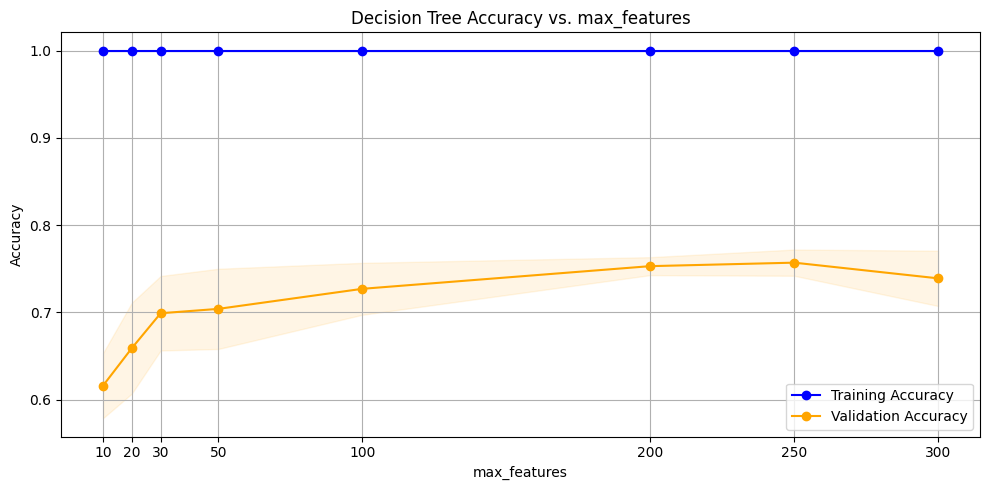

In [77]:
max_features_values = [10, 20, 30, 50, 100, 200, 250, 300]

train_accuracies = []
val_accuracies = []
train_std_devs = []
val_std_devs = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for max_features in max_features_values:
    fold_train_accuracies = []
    fold_val_accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        decision_tree = DecisionTreeClassifier(max_features=max_features, random_state=42)

        decision_tree.fit(X_train, y_train)

        y_train_pred = decision_tree.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)

        y_val_pred = decision_tree.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        fold_val_accuracies.append(val_accuracy)

    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    train_std_devs.append(np.std(fold_train_accuracies))
    val_std_devs.append(np.std(fold_val_accuracies))

df_results_max_features = pd.DataFrame({
    'max_features': max_features_values,
    'training_accuracy_mean': train_accuracies,
    'training_accuracy_std': train_std_devs,
    'validation_accuracy_mean': val_accuracies,
    'validation_accuracy_std': val_std_devs
})

# Display the DataFrame
styled_table_max_features = df_results_max_features.style.set_table_attributes('style="width: 80%; margin: auto;"')
display(styled_table_max_features)

plt.figure(figsize=(10, 5))
plt.plot(max_features_values, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(max_features_values, val_accuracies, marker='o', label='Validation Accuracy', color='orange')
plt.fill_between(max_features_values,
                 np.array(train_accuracies) - np.array(train_std_devs),
                 np.array(train_accuracies) + np.array(train_std_devs),
                 color='blue', alpha=0.1)
plt.fill_between(max_features_values,
                 np.array(val_accuracies) - np.array(val_std_devs),
                 np.array(val_accuracies) + np.array(val_std_devs),
                 color='orange', alpha=0.1)

plt.title('Decision Tree Accuracy vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.xticks(max_features_values)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Question 3


### Question 3.1


**Parameter Description:** After running experiments, it is apparent that the following parameters give the highest accuracy:
1. Criterion: gini
2. n_estimators: 250
3. random_state: 42
4. min_samples_leaf: 2

,n_estimators,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std
0,10,0.999000,0.000500,0.900000,0.007071
1,50,1.000000,0.000000,0.943000,0.010296
2,100,1.000000,0.000000,0.949000,0.012410
3,150,1.000000,0.000000,0.947000,0.009798
4,200,1.000000,0.000000,0.949000,0.012000
5,250,1.000000,0.000000,0.950000,0.010954


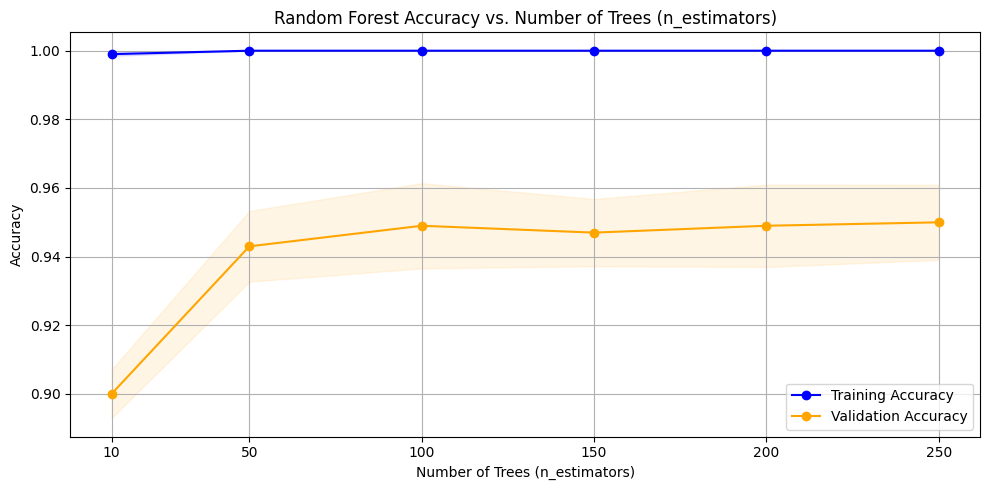

In [78]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_values = [10, 50, 100, 150, 200, 250]

train_accuracies = []
val_accuracies = []
train_std_devs = []
val_std_devs = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_estimators in n_estimators_values:
    fold_train_accuracies = []
    fold_val_accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        rf_model = RandomForestClassifier(
            n_estimators=n_estimators,
            min_samples_leaf=1,
            criterion='gini',
            random_state=42
        )

        rf_model.fit(X_train, y_train)

        y_train_pred = rf_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)

        y_val_pred = rf_model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        fold_val_accuracies.append(val_accuracy)

    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    train_std_devs.append(np.std(fold_train_accuracies))
    val_std_devs.append(np.std(fold_val_accuracies))

df_results_n_estimators = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'training_accuracy_mean': train_accuracies,
    'training_accuracy_std': train_std_devs,
    'validation_accuracy_mean': val_accuracies,
    'validation_accuracy_std': val_std_devs
    })

styled_table_n_estimators = df_results_n_estimators.style.set_table_attributes('style="width: 100%; margin: auto;"')
display(styled_table_n_estimators)

plt.figure(figsize=(10, 5))
plt.plot(df_results_n_estimators['n_estimators'], df_results_n_estimators['training_accuracy_mean'], marker='o', label='Training Accuracy', color='blue')
plt.plot(df_results_n_estimators['n_estimators'], df_results_n_estimators['validation_accuracy_mean'], marker='o', label='Validation Accuracy', color='orange')
plt.fill_between(df_results_n_estimators['n_estimators'],
                 df_results_n_estimators['training_accuracy_mean'] - df_results_n_estimators['training_accuracy_std'],
                 df_results_n_estimators['training_accuracy_mean'] + df_results_n_estimators['training_accuracy_std'],
                 color='blue', alpha=0.1)
plt.fill_between(df_results_n_estimators['n_estimators'],
                 df_results_n_estimators['validation_accuracy_mean'] - df_results_n_estimators['validation_accuracy_std'],
                 df_results_n_estimators['validation_accuracy_mean'] + df_results_n_estimators['validation_accuracy_std'],
                 color='orange', alpha=0.1)

plt.title('Random Forest Accuracy vs. Number of Trees (n_estimators)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_values)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

,min_samples_leaf,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std
0,1,1.000000,0.000000,0.950000,0.010954
1,2,0.999750,0.000500,0.952000,0.012884
2,5,0.985250,0.003000,0.949000,0.013191
3,10,0.967000,0.002318,0.941000,0.014967
4,20,0.941250,0.004610,0.914000,0.017146


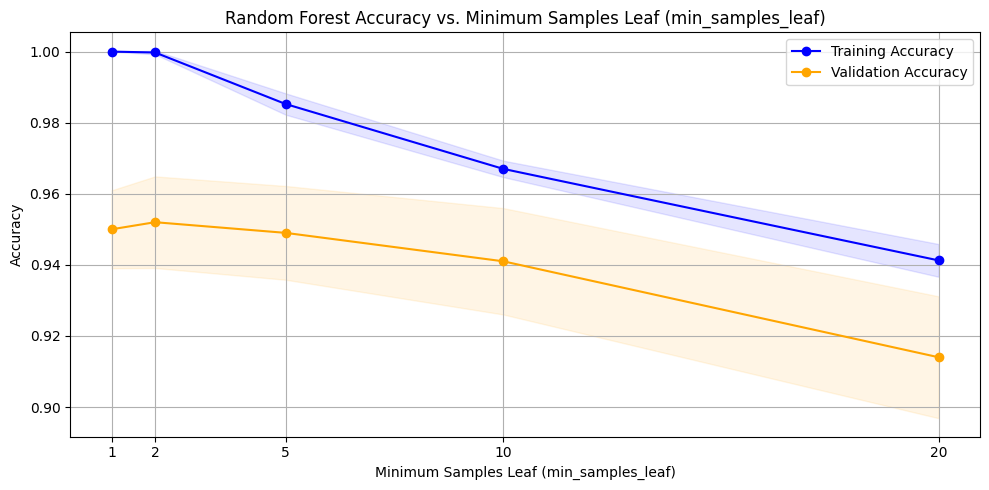

In [79]:
min_samples_leaf_values = [1, 2, 5, 10, 20]

train_accuracies = []
val_accuracies = []
train_std_devs = []
val_std_devs = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for min_samples_leaf in min_samples_leaf_values:
    fold_train_accuracies = []
    fold_val_accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        rf_model = RandomForestClassifier(
            n_estimators=250,
            min_samples_leaf=min_samples_leaf,
            criterion='gini',
            random_state=42
        )


        rf_model.fit(X_train, y_train)

        y_train_pred = rf_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)

        y_val_pred = rf_model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        fold_val_accuracies.append(val_accuracy)

    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    train_std_devs.append(np.std(fold_train_accuracies))
    val_std_devs.append(np.std(fold_val_accuracies))

results_min_samples_leaf = pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_values,
    'training_accuracy_mean': train_accuracies,
    'training_accuracy_std': train_std_devs,
    'validation_accuracy_mean': val_accuracies,
    'validation_accuracy_std': val_std_devs
})

styled_table_min_samples_leaf = results_min_samples_leaf.style.set_table_attributes('style="width: 100%; margin: auto;"')
display(styled_table_min_samples_leaf)

plt.figure(figsize=(10, 5))
plt.plot(results_min_samples_leaf['min_samples_leaf'], results_min_samples_leaf['training_accuracy_mean'], marker='o', label='Training Accuracy', color='blue')
plt.plot(results_min_samples_leaf['min_samples_leaf'], results_min_samples_leaf['validation_accuracy_mean'], marker='o', label='Validation Accuracy', color='orange')
plt.fill_between(results_min_samples_leaf['min_samples_leaf'],
                 results_min_samples_leaf['training_accuracy_mean'] - results_min_samples_leaf['training_accuracy_std'],
                 results_min_samples_leaf['training_accuracy_mean'] + results_min_samples_leaf['training_accuracy_std'],
                 color='blue', alpha=0.1)
plt.fill_between(results_min_samples_leaf['min_samples_leaf'],
                 results_min_samples_leaf['validation_accuracy_mean'] - results_min_samples_leaf['validation_accuracy_std'],
                 results_min_samples_leaf['validation_accuracy_mean'] + results_min_samples_leaf['validation_accuracy_std'],
                 color='orange', alpha=0.1)

plt.title('Random Forest Accuracy vs. Minimum Samples Leaf (min_samples_leaf)')
plt.xlabel('Minimum Samples Leaf (min_samples_leaf)')
plt.ylabel('Accuracy')
plt.xticks(min_samples_leaf_values)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Question 4

### Question 4.1
The preprocessing function is applied to the testing data. It removes the special characters, it converts the text into lower case. Then lemmatization operation is performed on the text.

Then we generate the TFIDF matrix for this preprocessed testing set

In [80]:
test = pd.read_csv('/content/news-test.csv')
test['Text'] = test['Text'].apply(preprocess_text)

In [81]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)
X_test = tfidf.fit_transform(test['Text'])

### Question 4.2
After conducting several experiments and performing hyperparameter tuning using 5-Fold cross validation, it is understood that Random Forest Classifier is giving a better result, with the following parameters:
1. Criterion: gini
2. Random_state: 42
3. n_estimators: 250
4. min_samples_leaf: 2

### Question 4.3
With the above mentioned parameters, Random Forest performs well on the training data. The training accuracy is 0.935.

In [82]:
final_model = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)

final_model.fit(X, y)
y_train_pred = rf_model.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)

print("Training Accuracy: ", train_accuracy)

Training Accuracy:  0.935


### Question 4.4

In [83]:
y_test_pred = final_model.predict(X_test)

In [84]:
data = {
    'ArticleId': test['ArticleId'],
    'Label': y_test_pred
}

labels = pd.DataFrame(data)
labels.to_csv('labels.csv', index=False)